In [ ]:
import zipfile
import os

zip_path = "/content/First Print.zip"  # Replace with your file name
extract_folder = "First_images"  # Folder where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract files to "images" folder

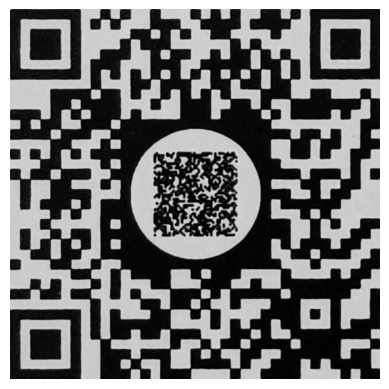

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = os.path.join(extract_folder, "/content/First_images/First Print/input_image_active (1).png")  # Replace with an actual image name
image = cv2.imread(image_path)

plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

In [ ]:
import zipfile
import os
zip_path = "/content/Second Print.zip"
extract_fd = "Second_images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_fd)

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset folders
first_prints_path = '/content/First_images/First Print'
second_prints_path = '/content/Second_images/Second Print'

# Load images and labels
first_prints = []
second_prints = []

for file in os.listdir(first_prints_path):
    img = cv2.imread(os.path.join(first_prints_path, file))
    img = cv2.resize(img, (224, 224))  # Resize images to a uniform size
    first_prints.append(img)

for file in os.listdir(second_prints_path):
    img = cv2.imread(os.path.join(second_prints_path, file))
    img = cv2.resize(img, (224, 224))  # Resize images to a uniform size
    second_prints.append(img)

# Create labels
first_labels = [0] * len(first_prints)  # Label for first prints (original)
second_labels = [1] * len(second_prints)  # Label for second prints (counterfeit)

# Combine images and labels
images = first_prints + second_prints
labels = first_labels + second_labels

# Normalize pixel values
images = np.array(images) / 255.0

# Split dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Optional: Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

datagen.fit(train_images)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import numpy as np

# Convert train_images and train_labels to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Ensure labels are properly formatted (e.g., one-hot encoded for multi-class classification)
# If it's binary classification, labels should be integers (0 or 1).

# Train the model
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),  # Use ImageDataGenerator for augmentation
    validation_data=(val_images, val_labels),  # Validation data
    epochs=10
)


# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(val_images, val_labels),
                    epochs=10)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.5031 - loss: 2.8044 - val_accuracy: 0.4750 - val_loss: 0.7637
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4878 - loss: 0.7121 - val_accuracy: 0.5250 - val_loss: 0.6908
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4930 - loss: 0.6941 - val_accuracy: 0.4750 - val_loss: 0.6958
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5064 - loss: 0.6921 - val_accuracy: 0.4750 - val_loss: 0.6926
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4756 - loss: 0.6915 - val_accuracy: 0.4750 - val_loss: 0.6974
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5003 - loss: 0.6904 - val_accuracy: 0.4750 - val_loss: 0.6923
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5238 - loss: 0.6777 - val_accuracy: 0.4750 - val_loss: 0.6860
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5090 - loss: 0.6733 - val_accuracy: 0.4750 - val_loss: 0.6710
Epoch 9/

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_images, val_labels)

# Print the evaluation metrics
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Generate predictions for the validation set
y_pred = (model.predict(val_images) > 0.5).astype(int)

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(val_labels, y_pred, target_names=['First Print', 'Second Print'])
conf_matrix = confusion_matrix(val_labels, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 0.8750 - loss: 0.9515
Validation Loss: 0.9028589129447937
Validation Accuracy: 0.875
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step
Classification Report:
               precision    recall  f1-score   support

 First Print       1.00      0.76      0.86        21
Second Print       0.79      1.00      0.88        19

    accuracy                           0.88        40
   macro avg       0.90      0.88      0.87        40
weighted avg       0.90      0.88      0.87        40

Confusion Matrix:
 [[16  5]
 [ 0 19]]


In [ ]:
model.save("counterfeit_detection_model.h5")

In [ ]:
from google.colab import files
files.download("counterfeit_detection_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>